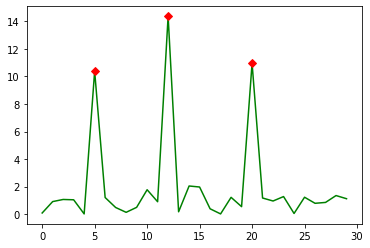

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# on initialise un seuil
threshold = 5

# On initialise une liste de 30 points entre 200 et 230
points = np.random.uniform(200, 230, 30)

# on insère des outliers aux indices 5, 12 et 20 deux plus bas et un plus grand
points[5] = 130
points[12] = 96
points[20] = 312

# Methode de l'écart moyen absolu
def median_absolute_deviation(points):   
    median = np.median(points)
    median_removed = np.abs(points - median)
    median_deviation = np.median(median_removed)
    return list(median_removed / median_deviation)

statistic = median_absolute_deviation(points)

# on récupère les indices de points où les "outliers" dépassent le seuil fixé
outliers = []
for i in range(len(statistic)):
    if statistic[i] > threshold:
        outliers.append(i)

plt.plot(statistic, '-gD', markevery=outliers, markerfacecolor='red', markeredgecolor = "red")
plt.show()

### Etapes de la méthodes median_absolute_deviation(points)

On calcule la mediane de notre liste de points

In [3]:
median = np.median(points)
median

218.55760595784193

On recupère la valeur absolue de la soustraction de chaqu'un des points par notre médiane
ça permet de gérer les valeurs au dessus comme en dessous de notre moyenne de référence 

In [4]:
median_removed = np.abs(points - median)
[round(point, 2) for point in list(median_removed)]

[0.73,
 7.79,
 9.1,
 8.9,
 0.16,
 88.56,
 10.3,
 4.14,
 1.14,
 4.22,
 15.13,
 7.7,
 122.56,
 1.48,
 17.44,
 16.82,
 3.33,
 0.16,
 10.42,
 4.66,
 93.44,
 10.0,
 8.15,
 10.9,
 0.43,
 10.49,
 6.73,
 7.27,
 11.52,
 9.57]

On peut déjà voir que la plupart des chiffres se trouvent entre 0 et 12 seul les outliers que l'on a déposés dépassent pour arriver entre 80 et 120

Notre nouvelle mediane 

In [5]:
median_deviation = np.median(median_removed)
median_deviation

8.526086462187223

Et on divise notre nouvelle mediane à chaque points 

In [6]:
[round(point, 2) for point in list(median_removed / median_deviation)]

[0.09,
 0.91,
 1.07,
 1.04,
 0.02,
 10.39,
 1.21,
 0.49,
 0.13,
 0.49,
 1.77,
 0.9,
 14.37,
 0.17,
 2.05,
 1.97,
 0.39,
 0.02,
 1.22,
 0.55,
 10.96,
 1.17,
 0.96,
 1.28,
 0.05,
 1.23,
 0.79,
 0.85,
 1.35,
 1.12]

Nos valeurs limites resortent clairement, pour paramétrer le seuil il suffit de trouver la valeur que l'on juge limite dans une liste donnée et de voir quel seuil les discrimines

Voici nos valeurs limites

In [7]:
threshold = 5
outliers = []
for i in range(len(statistic)):
    if statistic[i] > threshold:
        outliers.append(i)
outliers

[5, 12, 20]

Imaginons que en fait on veut être plus large mais 96 est une valeur quand même trop basse

In [8]:
threshold = 11
outliers = []
for i in range(len(statistic)):
    if statistic[i] > threshold:
        outliers.append(i)
outliers

[12]